In [ ]:
!pip install qiskit
!pip install qiskit_machine_learning
!pip install qiskit_algorithm
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.8/97.8 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.6/308.6 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512617 sha256=e1cb8393e83e41b8b1cd67859849cd6f940168ec453acf303e6ec5aced2e982b
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab7

In [1]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes, EfficientSU2, TwoLocal
from qiskit_machine_learning.algorithms import VQC
from qiskit_algorithms.optimizers import COBYLA
from qiskit_algorithms.utils import algorithm_globals
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
import matplotlib.pyplot as plt
from IPython.display import clear_output
import numpy as np
from qiskit.primitives import Sampler
import time

In [2]:
heart = fetch_openml(name="heart", version=1)

X_sparse, Y = heart['data'], heart['target']

X = X_sparse.toarray()

X_scaled = StandardScaler(with_mean=False).fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

/home/gzuz/.local/lib/python3.8/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


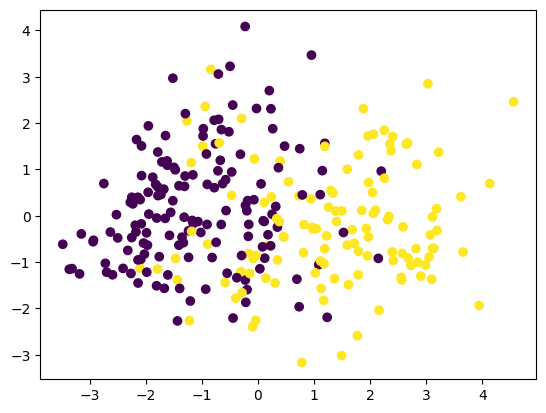

In [3]:
pca = PCA(n_components=2).fit_transform(X_scaled)

plt.scatter(pca[:,0], pca[:,1], c=Y)
plt.show()

In [4]:
MAXITR = 100
num_qubits = X.shape[1]
opt = COBYLA(maxiter=MAXITR)

In [ ]:
featuremap = ZZFeatureMap(feature_dimension=num_qubits, reps=1, parameter_prefix='x')
ansatz = RealAmplitudes(num_qubits=num_qubits, reps=1)

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:269: UserWarning: Style JSON file 'ixq.json' not found in any of these locations: /usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/styles/ixq.json, ixq.json. Will use default style.
  self._style, def_font_ratio = load_style(self._style)


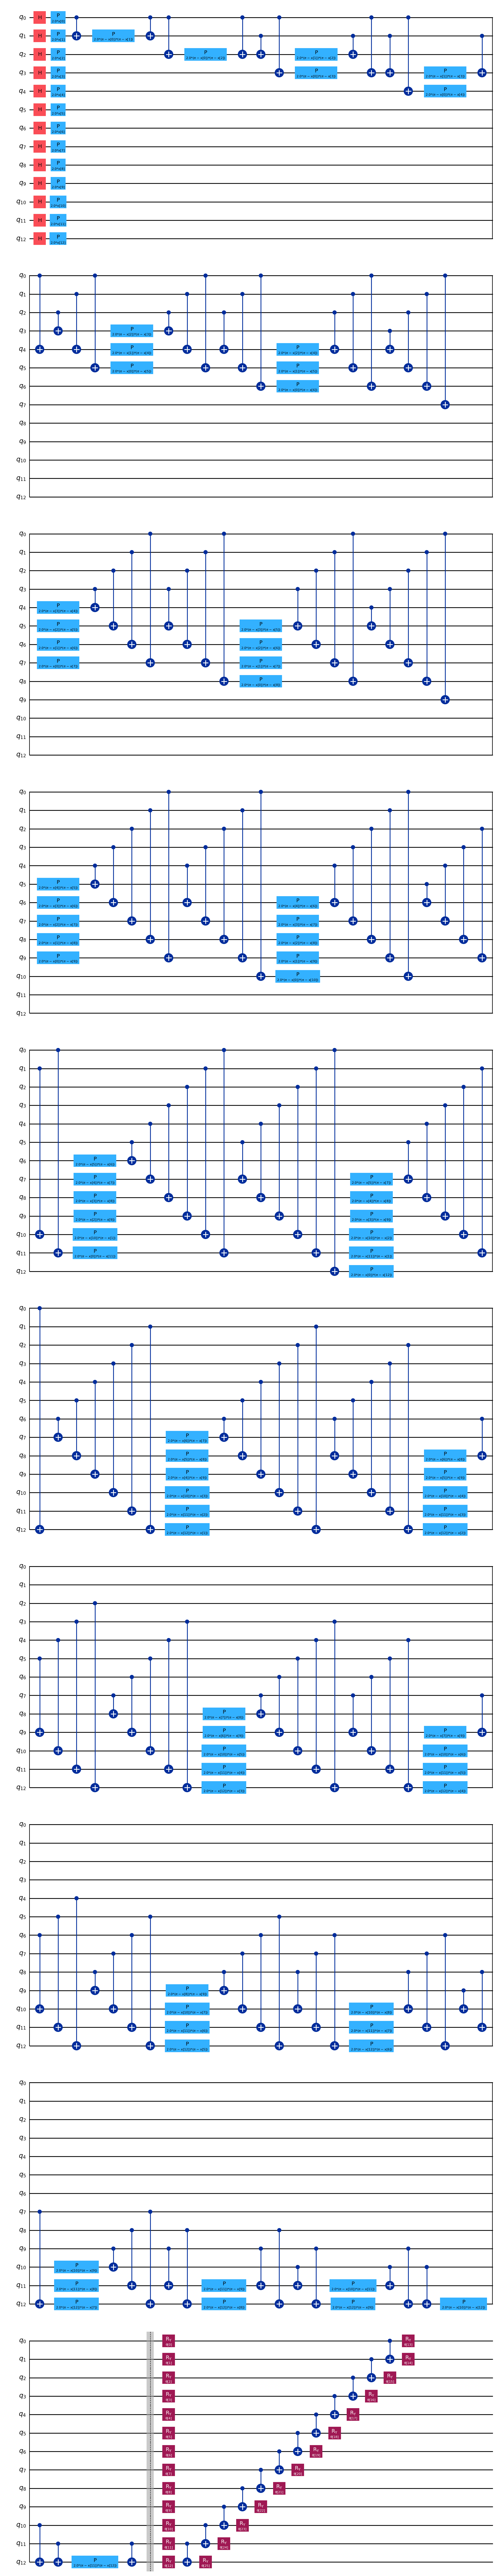

In [ ]:
qc = QuantumCircuit(num_qubits)
qc.compose(featuremap, inplace=True)
qc.barrier()
qc.compose(ansatz, inplace=True)
qc.decompose().draw(output='mpl', style='ixq')

In [5]:
objective_func_vals = []

def callback_graph(weights, obj_func_eval):
  clear_output(wait=True)
  objective_func_vals.append(obj_func_eval)
  plt.title("Objective function value against iteration")
  plt.xlabel("Iteration")
  plt.ylabel("Objective function value")
  plt.plot(range(len(objective_func_vals)), objective_func_vals)
  plt.show()

In [ ]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []

In [ ]:
vqc = VQC(
    feature_map=featuremap,
    ansatz=ansatz,
    optimizer=opt,
    callback=callback_graph,
)

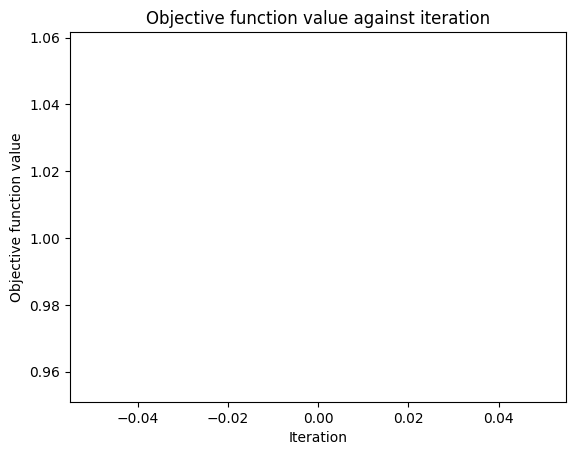

KeyboardInterrupt: 

In [ ]:
start = time.time()
vqc.fit(X_train, Y_train)
elapsed = time.time() - start

In [ ]:
preds = vqc.predict(X_test)
score = vqc.score(X_test, Y_test)
precision = precision_score(Y_test, preds, average='weighted')
accuracy = accuracy_score(Y_test, preds)
recall = recall_score(Y_test, preds, average='weighted')
f1 = f1_score(Y_test, preds, average='weighted')

In [ ]:
times.append(elapsed)
precisions.append(precision)
accuracies.append(accuracy)
recalls.append(recall)
f1s.append(f1)

In [ ]:
print("Precision:\n",precisions)
print("Accuracy:\n",accuracies)
print("Recall:\n",recalls)
print("F1:\n",f1s)
print("Time:\n",times)

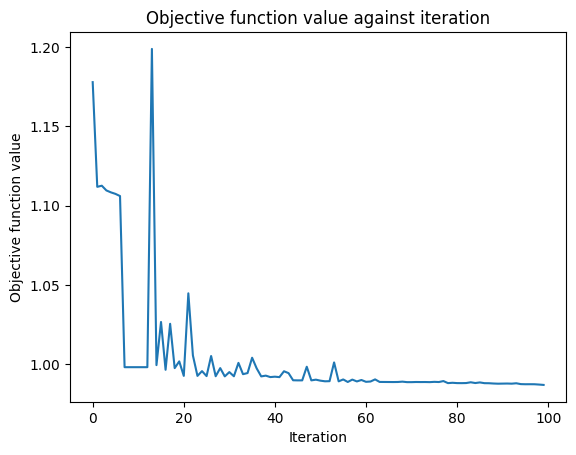

Precision:
 [0.4861111111111111, 0.475328947368421, 0.4900284900284901, 0.4900284900284901, 0.4900284900284901, 0.40885040885040885, 0.475328947368421, 0.5055555555555555, 0.4900284900284901, 0.5555555555555556]
Accuracy:
 [0.5, 0.5, 0.5185185185185185, 0.5185185185185185, 0.5185185185185185, 0.37037037037037035, 0.5, 0.5370370370370371, 0.5185185185185185, 0.5555555555555556]
Recall:
 [0.461038961038961, 0.45238095238095233, 0.4675324675324676, 0.4675324675324676, 0.4675324675324676, 0.38961038961038963, 0.45238095238095233, 0.4826839826839827, 0.4675324675324676, 0.5324675324675324]
F1:
 [0.4916387959866221, 0.48382185001903316, 0.4984567901234569, 0.4984567901234569, 0.4984567901234569, 0.37037037037037035, 0.48382185001903316, 0.512937595129376, 0.4984567901234569, 0.5555555555555556]
Time:
 [77.34919142723083, 80.19316530227661, 79.9885504245758, 80.04828310012817, 79.15946626663208, 78.46486282348633, 78.82099914550781, 82.99274587631226, 75.14943718910217, 60.62161087989807]


In [6]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 100
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x')
  ansatz = RealAmplitudes(num_qubits=num_qubits, reps=1)



  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)

**Precision:**
 [0.4861111111111111, 0.475328947368421, 0.4900284900284901, 0.4900284900284901, 0.4900284900284901, 0.40885040885040885, 0.475328947368421, 0.5055555555555555, 0.4900284900284901, 0.5555555555555556]

**Accuracy:**
 [0.5, 0.5, 0.5185185185185185, 0.5185185185185185, 0.5185185185185185, 0.37037037037037035, 0.5, 0.5370370370370371, 0.5185185185185185, 0.5555555555555556]

**Recall:**
 [0.461038961038961, 0.45238095238095233, 0.4675324675324676, 0.4675324675324676, 0.4675324675324676, 0.38961038961038963, 0.45238095238095233, 0.4826839826839827, 0.4675324675324676, 0.5324675324675324]

**F1:**
 [0.4916387959866221, 0.48382185001903316, 0.4984567901234569, 0.4984567901234569, 0.4984567901234569, 0.37037037037037035, 0.48382185001903316, 0.512937595129376, 0.4984567901234569, 0.5555555555555556]

**Time:**
 [77.34919142723083, 80.19316530227661, 79.9885504245758, 80.04828310012817, 79.15946626663208, 78.46486282348633, 78.82099914550781, 82.99274587631226, 75.14943718910217, 60.62161087989807]


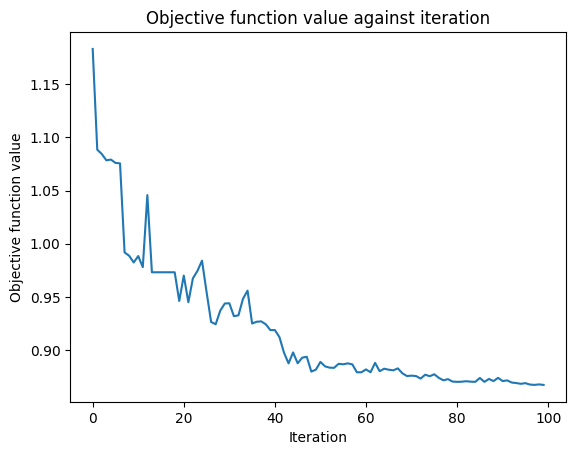

Precision:
 [0.5941697191697192, 0.6953703703703703, 0.5704248366013073, 0.6784188034188035, 0.6222222222222221, 0.6172839506172839, 0.5999688327879071, 0.5222013758599124, 0.718007662835249, 0.703448275862069]
Accuracy:
 [0.5740740740740741, 0.6851851851851852, 0.5740740740740741, 0.6481481481481481, 0.6111111111111112, 0.5925925925925926, 0.5925925925925926, 0.5555555555555556, 0.7037037037037037, 0.6666666666666666]
Recall:
 [0.5735930735930737, 0.6818181818181819, 0.5476190476190476, 0.6601731601731602, 0.6038961038961039, 0.5974025974025974, 0.5800865800865801, 0.49783549783549785, 0.7056277056277056, 0.6839826839826839]
F1:
 [0.5792737278611014, 0.6881834215167549, 0.5720584071512357, 0.6524078557976862, 0.6148148148148148, 0.5976851851851853, 0.5954861111111112, 0.5272919978802332, 0.7070282063269441, 0.6703448275862068]
Time:
 [72.49908089637756, 78.73571419715881, 78.13620400428772, 96.00776791572571, 95.41925764083862, 96.02940201759338, 95.75149297714233, 95.4918942451477, 9

In [7]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 100
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x')
  ansatz = RealAmplitudes(num_qubits=num_qubits, reps=2)



  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)

**Precision:**
 [0.5941697191697192, 0.6953703703703703, 0.5704248366013073, 0.6784188034188035, 0.6222222222222221, 0.6172839506172839, 0.5999688327879071, 0.5222013758599124, 0.718007662835249, 0.703448275862069]

**Accuracy:**
 [0.5740740740740741, 0.6851851851851852, 0.5740740740740741, 0.6481481481481481, 0.6111111111111112, 0.5925925925925926, 0.5925925925925926, 0.5555555555555556, 0.7037037037037037, 0.6666666666666666]

**Recall:**
 [0.5735930735930737, 0.6818181818181819, 0.5476190476190476, 0.6601731601731602, 0.6038961038961039, 0.5974025974025974, 0.5800865800865801, 0.49783549783549785, 0.7056277056277056, 0.6839826839826839]

**F1:**
 [0.5792737278611014, 0.6881834215167549, 0.5720584071512357, 0.6524078557976862, 0.6148148148148148, 0.5976851851851853, 0.5954861111111112, 0.5272919978802332, 0.7070282063269441, 0.6703448275862068]

**Time:**
 [72.49908089637756, 78.73571419715881, 78.13620400428772, 96.00776791572571, 95.41925764083862, 96.02940201759338, 95.75149297714233, 95.4918942451477, 95.84396195411682, 95.93709945678711]


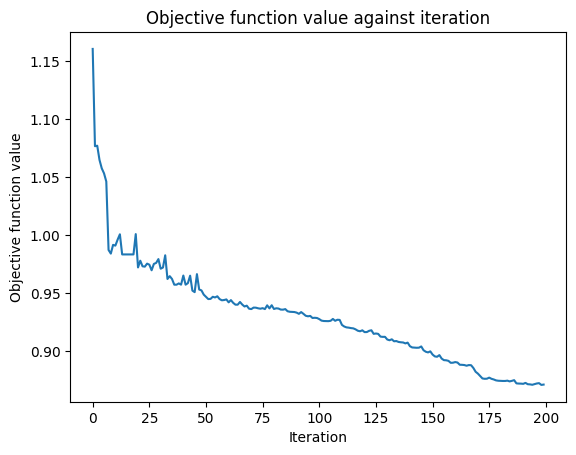

Precision:
 [0.6913580246913581, 0.6913580246913581, 0.7045177045177046, 0.7045177045177046, 0.7314814814814815, 0.7045177045177046, 0.5802469135802469, 0.7158119658119658, 0.703448275862069, 0.7045177045177046]
Accuracy:
 [0.6666666666666666, 0.6666666666666666, 0.6851851851851852, 0.6851851851851852, 0.6851851851851852, 0.6851851851851852, 0.5555555555555556, 0.6851851851851852, 0.6666666666666666, 0.6851851851851852]
Recall:
 [0.6753246753246753, 0.6753246753246753, 0.6904761904761905, 0.6904761904761905, 0.6038961038961039, 0.6904761904761905, 0.5584415584415584, 0.699134199134199, 0.6839826839826839, 0.6904761904761905]
F1:
 [0.6708333333333334, 0.6708333333333334, 0.6890284075495097, 0.6890284075495097, 0.6268861454046638, 0.6890284075495097, 0.5611111111111111, 0.6889965025558246, 0.6703448275862068, 0.6890284075495097]
Time:
 [193.74523210525513, 193.5769853591919, 206.20867228507996, 153.81514239311218, 156.0512731075287, 150.82224321365356, 148.81355333328247, 153.89923739433

In [8]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 200
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x')
  ansatz = RealAmplitudes(num_qubits=num_qubits, reps=2)



  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)

**Precision:**
 [0.6913580246913581, 0.6913580246913581, 0.7045177045177046, 0.7045177045177046, 0.7314814814814815, 0.7045177045177046, 0.5802469135802469, 0.7158119658119658, 0.703448275862069, 0.7045177045177046]

**Accuracy:**
 [0.6666666666666666, 0.6666666666666666, 0.6851851851851852, 0.6851851851851852, 0.6851851851851852, 0.6851851851851852, 0.5555555555555556, 0.6851851851851852, 0.6666666666666666, 0.6851851851851852]

**Recall:**
 [0.6753246753246753, 0.6753246753246753, 0.6904761904761905, 0.6904761904761905, 0.6038961038961039, 0.6904761904761905, 0.5584415584415584, 0.699134199134199, 0.6839826839826839, 0.6904761904761905]

**F1:**
 [0.6708333333333334, 0.6708333333333334, 0.6890284075495097, 0.6890284075495097, 0.6268861454046638, 0.6890284075495097, 0.5611111111111111, 0.6889965025558246, 0.6703448275862068, 0.6890284075495097]

**Time:**
 [193.74523210525513, 193.5769853591919, 206.20867228507996, 153.81514239311218, 156.0512731075287, 150.82224321365356, 148.81355333328247, 153.89923739433289, 148.51355171203613, 152.4503231048584]


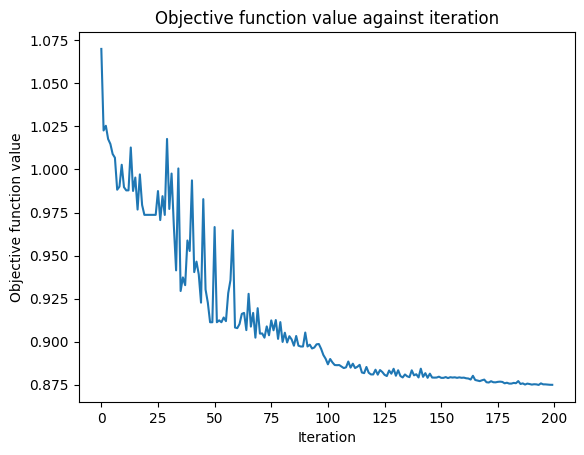

Precision:
 [0.6784188034188035, 0.6587962962962963, 0.718007662835249, 0.688888888888889, 0.7014800917239941, 0.7035024154589372, 0.5916666666666667, 0.7396011396011396, 0.6539351851851852, 0.6081226053639847]
Accuracy:
 [0.6481481481481481, 0.6481481481481481, 0.7037037037037037, 0.6851851851851852, 0.7037037037037037, 0.6851851851851852, 0.6111111111111112, 0.7407407407407407, 0.6481481481481481, 0.5925925925925926]
Recall:
 [0.6601731601731602, 0.6428571428571428, 0.7056277056277056, 0.6212121212121212, 0.6536796536796536, 0.6125541125541125, 0.5606060606060606, 0.7012987012987013, 0.564935064935065, 0.5887445887445888]
F1:
 [0.6524078557976862, 0.6514991181657849, 0.7070282063269441, 0.6518177163338452, 0.6848613319201554, 0.640525728696833, 0.5908675799086758, 0.7299382716049384, 0.5829903978052126, 0.5971637836995481]
Time:
 [191.1734709739685, 217.8346393108368, 220.26941084861755, 219.84568309783936, 215.91615557670593, 171.24316263198853, 171.2103509902954, 197.21007227897644

In [9]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 200
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x')
  ansatz = RealAmplitudes(num_qubits=num_qubits, reps=3)



  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)

**Precision:**
 [0.6784188034188035, 0.6587962962962963, 0.718007662835249, 0.688888888888889, 0.7014800917239941, 0.7035024154589372, 0.5916666666666667, 0.7396011396011396, 0.6539351851851852, 0.6081226053639847]

**Accuracy:**
 [0.6481481481481481, 0.6481481481481481, 0.7037037037037037, 0.6851851851851852, 0.7037037037037037, 0.6851851851851852, 0.6111111111111112, 0.7407407407407407, 0.6481481481481481, 0.5925925925925926]

**Recall:**
 [0.6601731601731602, 0.6428571428571428, 0.7056277056277056, 0.6212121212121212, 0.6536796536796536, 0.6125541125541125, 0.5606060606060606, 0.7012987012987013, 0.564935064935065, 0.5887445887445888]

**F1:**
 [0.6524078557976862, 0.6514991181657849, 0.7070282063269441, 0.6518177163338452, 0.6848613319201554, 0.640525728696833, 0.5908675799086758, 0.7299382716049384, 0.5829903978052126, 0.5971637836995481]

**Time:**
 [191.1734709739685, 217.8346393108368, 220.26941084861755, 219.84568309783936, 215.91615557670593, 171.24316263198853, 171.2103509902954, 197.21007227897644, 222.01787757873535, 224.9162895679474]


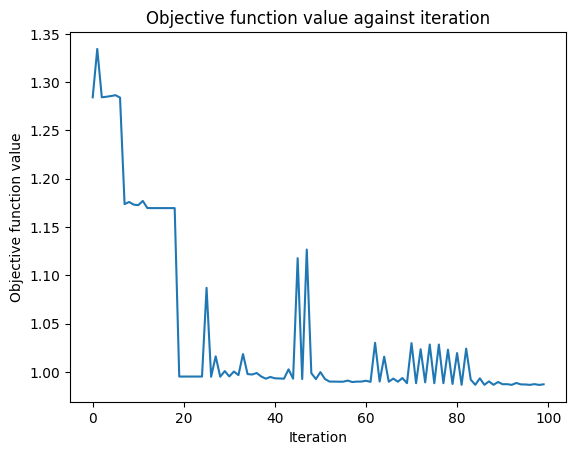

Precision:
 [0.5157163742690059, 0.4194444444444445, 0.5006182653241477, 0.6280701754385964, 0.5868055555555556, 0.48148148148148145, 0.5316239316239317, 0.47738169689389204, 0.5099415204678363, 0.5246913580246914]
Accuracy:
 [0.5370370370370371, 0.46296296296296297, 0.5185185185185185, 0.5555555555555556, 0.5370370370370371, 0.48148148148148145, 0.5555555555555556, 0.5185185185185185, 0.5185185185185185, 0.5370370370370371]
Recall:
 [0.49134199134199136, 0.40476190476190477, 0.47619047619047616, 0.5930735930735931, 0.5606060606060606, 0.4545454545454546, 0.5064935064935066, 0.4588744588744589, 0.48484848484848486, 0.5]
F1:
 [0.5220572685361416, 0.4350076103500761, 0.5069340016708438, 0.5512820512820513, 0.5387840670859538, 0.48148148148148145, 0.5370370370370371, 0.4878996643702526, 0.5135620915032679, 0.5292951814690945]
Time:
 [112.02085971832275, 118.18335509300232, 119.27915644645691, 120.80882978439331, 117.69941592216492, 118.90780806541443, 126.04792475700378, 123.6956186294555

In [11]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 100
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x')
  ansatz = TwoLocal(num_qubits=num_qubits, reps=1, entanglement_blocks='cz', rotation_blocks=['rz', 'ry'])




  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)

**Precision:**
 [0.5157163742690059, 0.4194444444444445, 0.5006182653241477, 0.6280701754385964, 0.5868055555555556, 0.48148148148148145, 0.5316239316239317, 0.47738169689389204, 0.5099415204678363, 0.5246913580246914]

**Accuracy:**
 [0.5370370370370371, 0.46296296296296297, 0.5185185185185185, 0.5555555555555556, 0.5370370370370371, 0.48148148148148145, 0.5555555555555556, 0.5185185185185185, 0.5185185185185185, 0.5370370370370371]
 
**Recall:**
 [0.49134199134199136, 0.40476190476190477, 0.47619047619047616, 0.5930735930735931, 0.5606060606060606, 0.4545454545454546, 0.5064935064935066, 0.4588744588744589, 0.48484848484848486, 0.5]

**F1:**
 [0.5220572685361416, 0.4350076103500761, 0.5069340016708438, 0.5512820512820513, 0.5387840670859538, 0.48148148148148145, 0.5370370370370371, 0.4878996643702526, 0.5135620915032679, 0.5292951814690945]

**Time:**
 [112.02085971832275, 118.18335509300232, 119.27915644645691, 120.80882978439331, 117.69941592216492, 118.90780806541443, 126.04792475700378, 123.69561862945557, 119.78796601295471, 115.16190934181213]


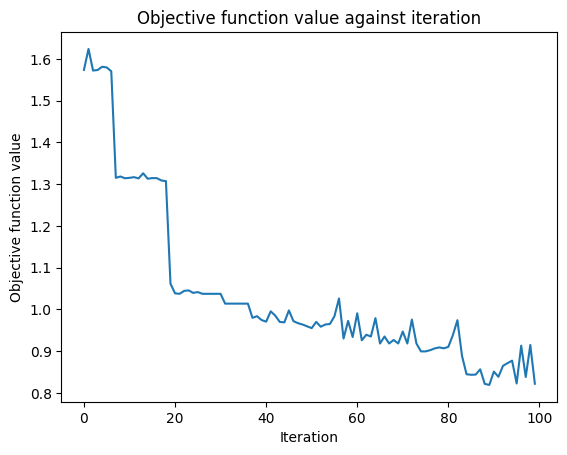

Precision:
 [0.6790123456790123, 0.7532051282051282, 0.6616541353383459, 0.6808510638297873, 0.7035024154589372, 0.549074074074074, 0.7208333333333333, 0.65818759936407, 0.6347222222222223, 0.6812169312169312]
Accuracy:
 [0.6851851851851852, 0.7222222222222222, 0.6666666666666666, 0.6666666666666666, 0.6851851851851852, 0.5370370370370371, 0.7222222222222222, 0.6666666666666666, 0.6481481481481481, 0.6851851851851852]
Recall:
 [0.6558441558441559, 0.7380952380952381, 0.6406926406926408, 0.5887445887445888, 0.6125541125541125, 0.525974025974026, 0.6774891774891775, 0.632034632034632, 0.5995670995670996, 0.6298701298701299]
F1:
 [0.6799207233989842, 0.7255851493139629, 0.6632352941176471, 0.6125, 0.640525728696833, 0.5414462081128748, 0.7077625570776255, 0.6586466165413534, 0.6298325722983257, 0.6611447811447811]
Time:
 [147.17748093605042, 155.76953792572021, 173.38553762435913, 158.28072118759155, 182.13984847068787, 176.92616748809814, 183.35962796211243, 192.69726514816284, 171.37487

In [12]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 100
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x')
  ansatz = TwoLocal(num_qubits=num_qubits, reps=2, entanglement_blocks='cz', rotation_blocks=['rz', 'ry'])




  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)

**Precision:**
 [0.6790123456790123, 0.7532051282051282, 0.6616541353383459, 0.6808510638297873, 0.7035024154589372, 0.549074074074074, 0.7208333333333333, 0.65818759936407, 0.6347222222222223, 0.6812169312169312]

**Accuracy:**
 [0.6851851851851852, 0.7222222222222222, 0.6666666666666666, 0.6666666666666666, 0.6851851851851852, 0.5370370370370371, 0.7222222222222222, 0.6666666666666666, 0.6481481481481481, 0.6851851851851852]

**Recall:**
 [0.6558441558441559, 0.7380952380952381, 0.6406926406926408, 0.5887445887445888, 0.6125541125541125, 0.525974025974026, 0.6774891774891775, 0.632034632034632, 0.5995670995670996, 0.6298701298701299]

**F1:**
 [0.6799207233989842, 0.7255851493139629, 0.6632352941176471, 0.6125, 0.640525728696833, 0.5414462081128748, 0.7077625570776255, 0.6586466165413534, 0.6298325722983257, 0.6611447811447811]

**Time:**
 [147.17748093605042, 155.76953792572021, 173.38553762435913, 158.28072118759155, 182.13984847068787, 176.92616748809814, 183.35962796211243, 192.69726514816284, 171.37487626075745, 148.38873648643494]


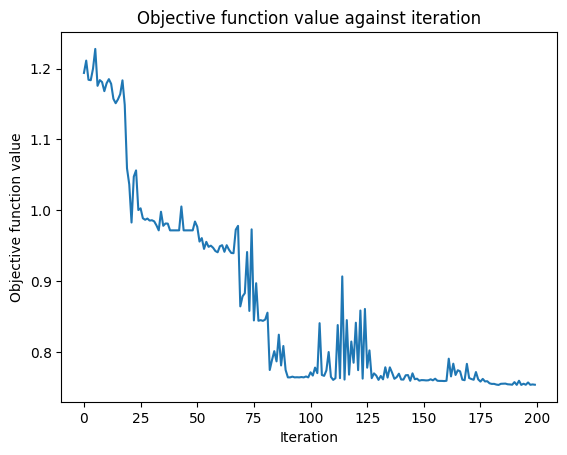

Precision:
 [0.6777777777777778, 0.6777777777777778, 0.6777777777777778, 0.7091848719755697, 0.6368786549707602]
Accuracy:
 [0.6851851851851852, 0.6851851851851852, 0.6851851851851852, 0.7037037037037037, 0.6481481481481481]
Recall:
 [0.6385281385281385, 0.6385281385281385, 0.6385281385281385, 0.645021645021645, 0.6082251082251082]
F1:
 [0.6687975646879757, 0.6687975646879757, 0.6687975646879757, 0.6769005847953217, 0.6367635240874676]
Time:
 [612.2488963603973, 631.482134103775, 649.5584645271301, 647.8317058086395, 600.6928508281708]


In [ ]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(5):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 200
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x')
  ansatz = TwoLocal(num_qubits=num_qubits, reps=3, entanglement_blocks='cz', rotation_blocks=['rz', 'ry'])




  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)

**Precision:**
1. 0.6777777777777778
2. 0.6777777777777778
3. 0.6777777777777778
4. 0.7091848719755697
5. 0.6368786549707602

**Accuracy:**
1. 0.6851851851851852
2. 0.6851851851851852
3. 0.6851851851851852
4. 0.7037037037037037
5. 0.6481481481481481

**Recall:**
1. 0.6385281385281385
2. 0.6385281385281385
3. 0.6385281385281385
4. 0.645021645021645
5. 0.6082251082251082

**F1:**
1. 0.6687975646879757
2. 0.6687975646879757
3. 0.6687975646879757
4. 0.6769005847953217
5. 0.6367635240874676

**Time:**
1. 612.2488963603973
2. 631.482134103775
3. 649.5584645271301
4. 647.8317058086395
5. 600.6928508281708

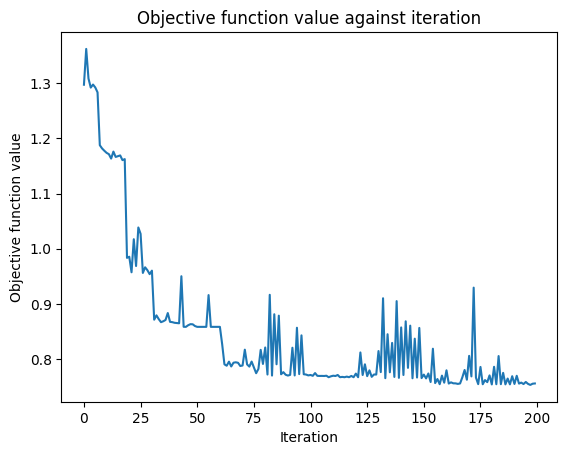

Precision:
 [0.7091848719755697, 0.7616792929292928, 0.7281746031746031, 0.6777777777777778, 0.6975799328740506]
Accuracy:
 [0.7037037037037037, 0.7592592592592593, 0.7222222222222222, 0.6851851851851852, 0.7037037037037037]
Recall:
 [0.645021645021645, 0.751082251082251, 0.6688311688311688, 0.6385281385281385, 0.670995670995671]
F1:
 [0.6769005847953217, 0.7602067183462532, 0.7010101010101011, 0.6687975646879757, 0.6965747702589808]
Time:
 [716.1731898784637, 709.7876553535461, 706.6054201126099, 707.3508057594299, 712.2728850841522]


In [ ]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(5):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 200
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x')
  ansatz = TwoLocal(num_qubits=num_qubits, reps=4, entanglement_blocks='cz', rotation_blocks=['rz', 'ry'])




  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)

**Precision:**
1. 0.7091848719755697
2. 0.7616792929292928
3. 0.7281746031746031
4. 0.6777777777777778
5. 0.6975799328740506

**Accuracy:**
1. 0.7037037037037037
2. 0.7592592592592593
3. 0.7222222222222222
4. 0.6851851851851852
5. 0.7037037037037037

**Recall:**
1. 0.645021645021645
2. 0.751082251082251
3. 0.6688311688311688
4. 0.6385281385281385
5. 0.670995670995671

**F1:**
1. 0.6769005847953217
2. 0.7602067183462532
3. 0.7010101010101011
4. 0.6687975646879757
5. 0.6965747702589808

**Time:**
1. 716.1731898784637
2. 709.7876553535461
3. 706.6054201126099
4. 707.3508057594299
5. 712.2728850841522